<a href="https://colab.research.google.com/github/heri2468/Deep-Learning/blob/master/Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [0]:
from keras .datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_test.shape

(10000,)

In [0]:
def plot_image(img):
  plt.imshow(img.reshape(28,28),cmap='gray')


In [11]:
x_train[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

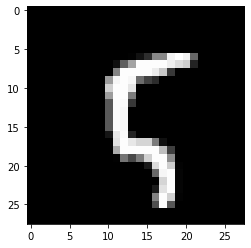

In [15]:
plot_image(x_train[100])

image is :  1


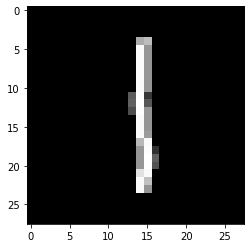

In [19]:
plot_image(x_train[1002])
print("image is : ",y_train[1002])

image is :  3


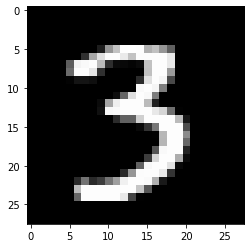

In [20]:
plot_image(x_train[10000])
print("image is : ",y_train[10000])

MODEL BUILDING

In [24]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [26]:
x_train.shape

(60000, 784)

In [27]:
x_test.shape

(10000, 784)

In [0]:
model = Sequential()
model.add( Dense(units=32,activation='relu',input_shape=(784,)) )
model.add( Dense(units=64,activation='relu' ))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=10,activation='softmax')) #final softmax is proababilities


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 40,010
Trainable params: 40,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
y_train.shape

(60000,)

In [0]:
#one hot encoding
#multi class classification
from keras.utils import  to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [34]:
y_train.shape

(60000, 10)

In [35]:
y_test.shape

(10000, 10)

In [36]:
#fitting
hist = model.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.6426 - accuracy: 0.8275 - val_loss: 0.3073 - val_accuracy: 0.9088
Epoch 2/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.2647 - accuracy: 0.9247 - val_loss: 0.2402 - val_accuracy: 0.9320
Epoch 3/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.2155 - accuracy: 0.9392 - val_loss: 0.1923 - val_accuracy: 0.9463
Epoch 4/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1728 - accuracy: 0.9504 - val_loss: 0.1936 - val_accuracy: 0.9489
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1543 - accuracy: 0.9566 - val_loss: 0.1750 - val_accuracy: 0.9539
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.1373 - accuracy: 0.9608 - val_loss: 0.1585 - val_accuracy: 0.9573
Epoch 7/10
60000/60000 [==============================] - 3s 54us/st

In [37]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 22us/step


[0.1410503041935852, 0.965399980545044]

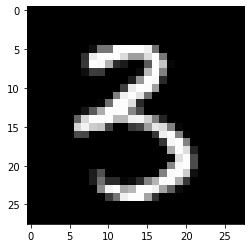

In [38]:
#predict for one image
plot_image(x_test[5000])

In [42]:
model.predict_classes(x_test[[5000]])

array([3])

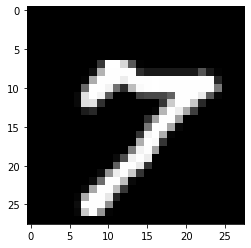

In [44]:
plot_image(x_test[9000])

In [45]:
model.predict_classes(x_test[[9000]])

array([7])